In [101]:
import pandas as pd
import time
today = time.strftime("%x")

df = pd.read_csv("Weather_Data/cities.csv")

In [93]:
df.head()

,City_ID!,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Saint George,US,2023-01-08 18:26:55,37.1041,-113.5841,9.68,59,20,2.57
1,1,Sur,OM,2023-01-08 18:26:55,22.5667,59.5289,21.36,72,0,1.28
2,2,Paharpur,PK,2023-01-08 18:26:55,32.1038,70.9724,13.13,45,0,1.99
3,3,Jamestown,US,2023-01-08 18:26:56,42.0970,-79.2353,-0.23,69,100,2.57
4,4,Chuy,UY,2023-01-08 18:26:56,-33.6971,-53.4616,25.75,54,2,6.59


In [97]:
lats = df["Lat"]
max_temps = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
wind_speed = df["Wind Speed"]

In [102]:
today

'01/08/23'

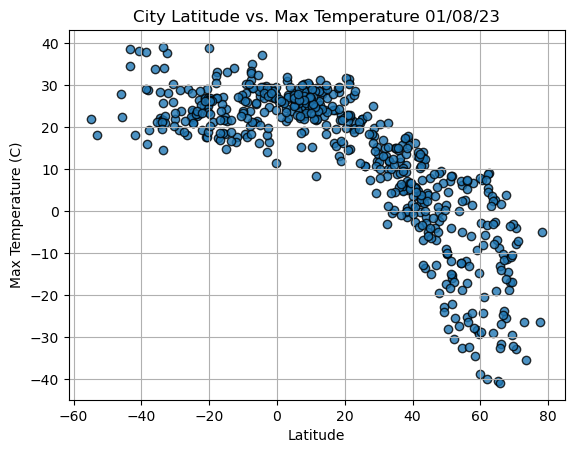

In [106]:
plt.scatter(lats,
           max_temps,
           edgecolor = "black",
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = "Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig1.png")

# Show plot.
plt.show()

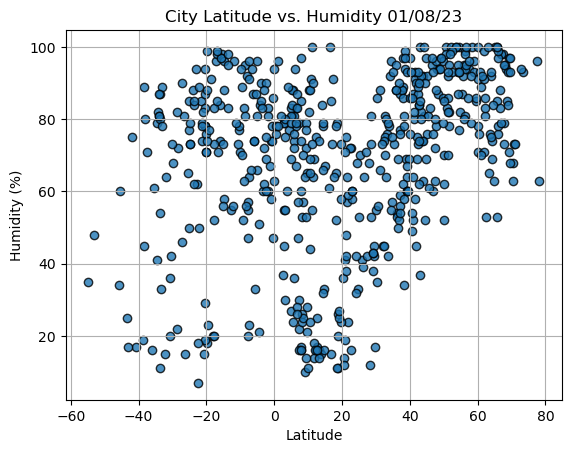

In [108]:
plt.scatter(lats,
           humidity,
           edgecolor = "black",
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = "Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_Data/Fig2.png")

# Show plot.
plt.show()

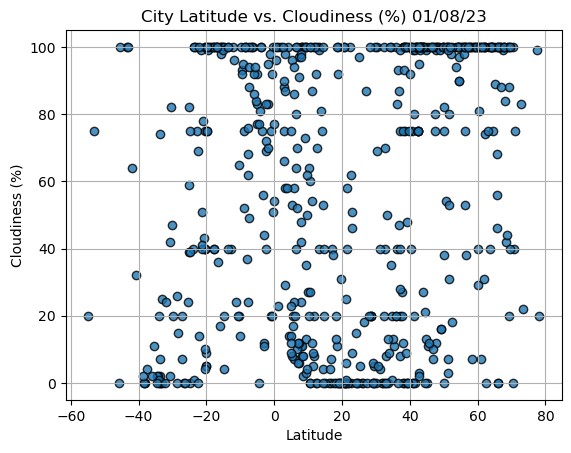

In [109]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

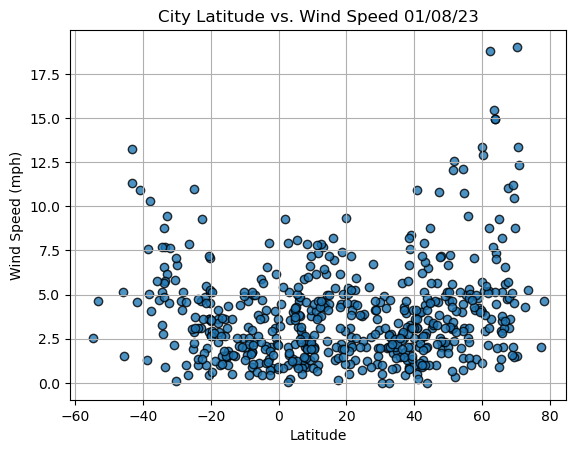

In [110]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()